In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = r"C:\Users\root\Documents\Git\bot_spacerman\spacerman_ai\machine_models\Friday\ocr_exports\export__20230103_022928.csv"

In [3]:
df =  pd.read_csv(file, sep='|')
df1 = df
df1 = df1[df1['type'] == 'crash']
df1 = df1[df1['crash_value'] > 0]
df1.drop('Unnamed: 0', inplace=True, axis=1)
df1.drop('type', inplace=True, axis=1)
df1.drop('extension', inplace=True, axis=1)
df1.drop('filename', inplace=True, axis=1)
df1.drop('text', inplace=True, axis=1)
df1.head()

,year,month,day,hour,minutes,seconds,crash_value,sequence
1,2022,12,24,0,36,32,32.01,1
2,2022,12,24,0,37,24,1.51,2
3,2022,12,24,0,37,49,1.82,3
4,2022,12,24,0,38,16,1.78,4
5,2022,12,24,0,38,43,1.84,5


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2422 entries, 1 to 5527
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         2422 non-null   int64  
 1   month        2422 non-null   int64  
 2   day          2422 non-null   int64  
 3   hour         2422 non-null   int64  
 4   minutes      2422 non-null   int64  
 5   seconds      2422 non-null   int64  
 6   crash_value  2422 non-null   float64
 7   sequence     2422 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 170.3 KB


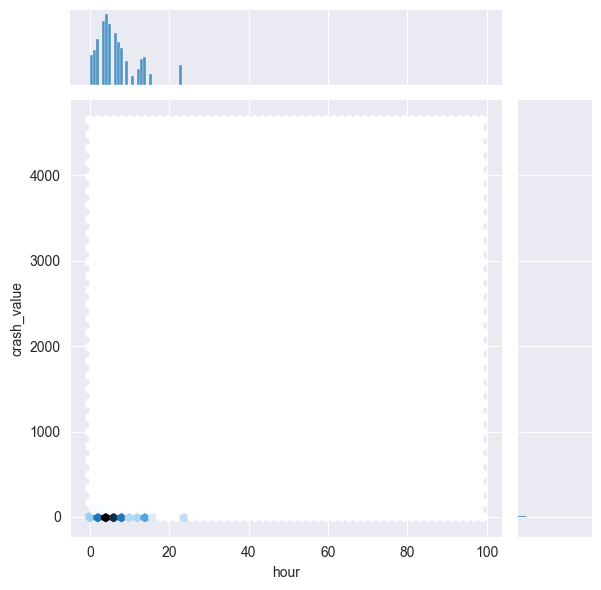

In [5]:
sns.jointplot(y='crash_value', x='hour', data=df1, kind='hex')

esses dados estão uma bosta.. kk

### Avaliação:
Preciso categorizar melhor os dados. Esta muito espalhado. Acabo ficando sem grafico.

In [16]:
def crash_classifier(x):
    if x == 1:
        return 0
    if 1 < x <= 2.1:
        return 1
    if 2.1 < x <= 3:
        return 2
    if 3 < x <= 5:
        return 3
    if 5 < x <= 10:
        return 4
    if 10 < x <= 20:
        return 5
    if 20 < x <= 50:
        return 6
    if 50 < x <= 150:
        return 7
    if 150 < x <= 500:
        return 8
    if 500 < x <= 4999:
        return 9
    if x == 5000:
        return 911
    return 999


clsf_dialect__crash = {
    0:{
        'meta': 'Valor minimo onde apenas a casa ganha',
        'min_val': 0,
        'max_val': 1,
        'name': 'la_casa',
    },
    1:{
        'meta': 'Valor valor com baixo ganho',
        'min_val': 1,
        'max_val': 2.1,
        'name': 'low_win',
    },
    2:{
        'meta': 'Aqui os ganhos começam a ficar interessantes',
        'min_val': 2.1,
        'max_val': 3,
        'name': 'win',
    },
    3:{
        'meta': 'Ganhos legais',
        'min_val': 3,
        'max_val': 5,
        'name': 'double_win',
    },
    4:{
        'meta': 'Considerável ganho',
        'min_val': 5,
        'max_val': 10,
        'name': 'real_win',
    },
    5:{
        'meta': 'Ja da pra parar..',
        'min_val': 10,
        'max_val': 20,
        'name': 'super_win',
    },
    6:{
        'meta': 'Fechar a banca',
        'min_val': 20,
        'max_val': 50,
        'name': 'go_home',
    },
    7:{
        'meta': 'Sorte Grande',
        'min_val': 50,
        'max_val': 150,
        'name': 'big_luck',
    },
    8:{
        'meta': 'Ilusão',
        'min_val': 150,
        'max_val': 500,
        'name': 'pink_elephant',
    },
    9:{
        'meta': 'Sério',
        'min_val': 500,
        'max_val': 4999,
        'name': 'realy',
    },
    911:{
        'meta': 'Impossivel',
        'min_val': 4999,
        'max_val': 5000,
        'name': 'impossible',
    },
    999:{
        'meta': 'Error',
        'min_val': -999999999,
        'max_val': 0,
        'name': 'error',
    }
}

In [7]:
df1['eval'] = df1.crash_value.apply(crash_classifier)

In [8]:
df1

,year,month,day,hour,minutes,seconds,crash_value,sequence,eval
1,2022,12,24,0,36,32,32.01,1,6
2,2022,12,24,0,37,24,1.51,2,1
3,2022,12,24,0,37,49,1.82,3,1
4,2022,12,24,0,38,16,1.78,4,1
5,2022,12,24,0,38,43,1.84,5,1
...,...,...,...,...,...,...,...,...,...
5523,2022,12,24,0,16,18,2.46,6,2
5524,2022,12,24,0,16,42,1.46,7,1
5525,2022,12,24,0,17,7,1.41,8,1
5526,2022,12,24,0,17,43,4.86,9,3


agora acho que tenho uma variável

Classe:  low_win


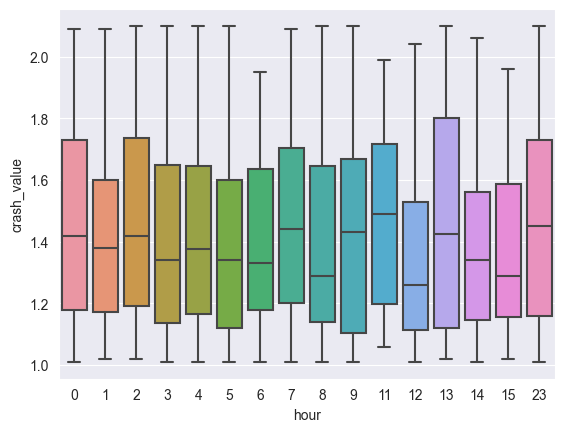

Classe:  win


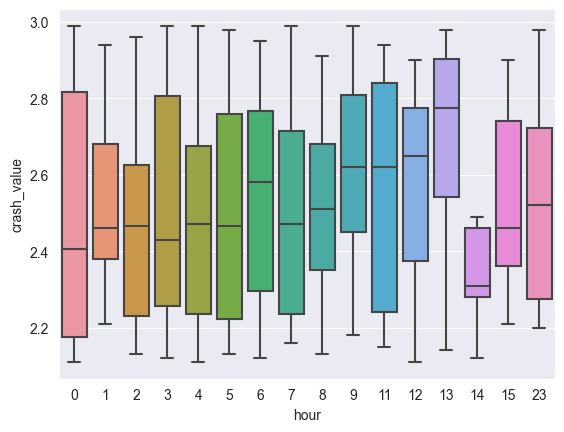

Classe:  double_win


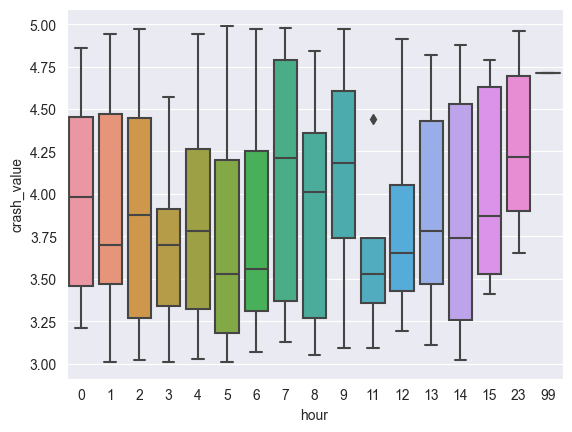

Classe:  real_win


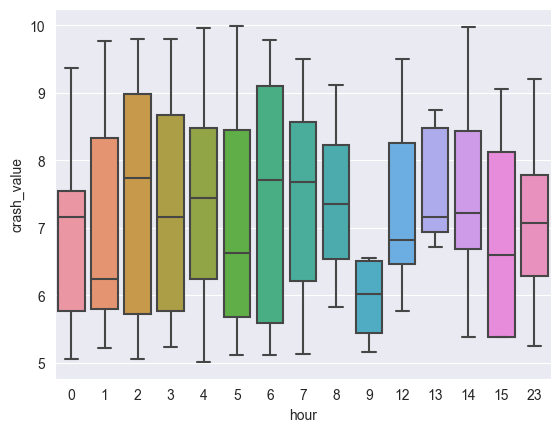

Classe:  super_win


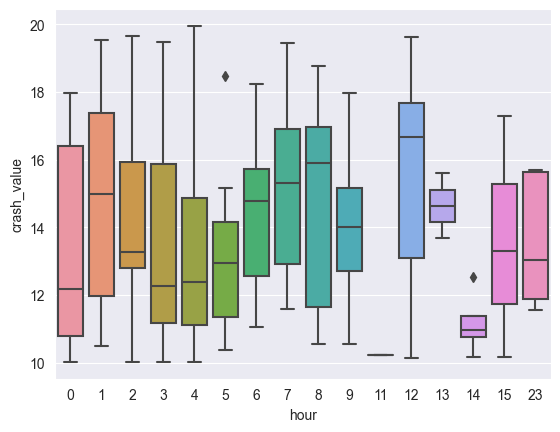

Classe:  go_home


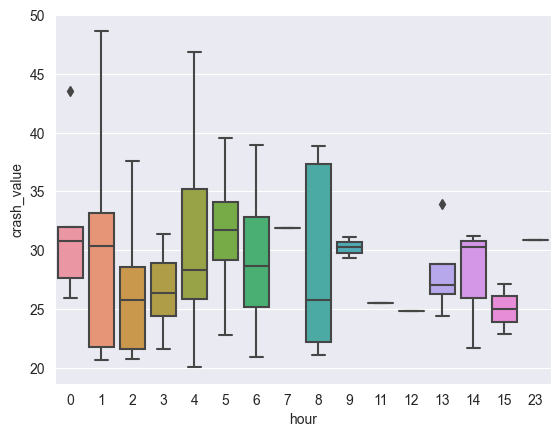

Classe:  big_luck


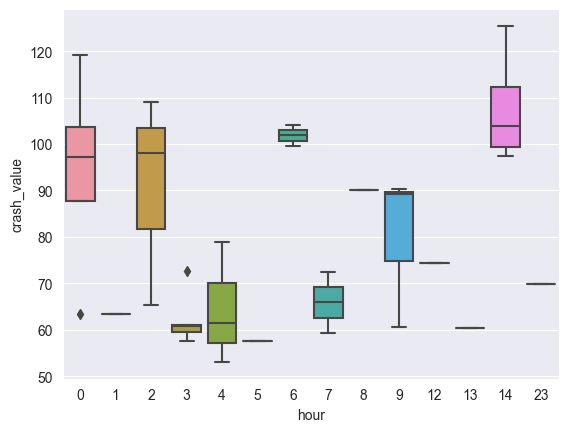

Classe:  pink_elephant


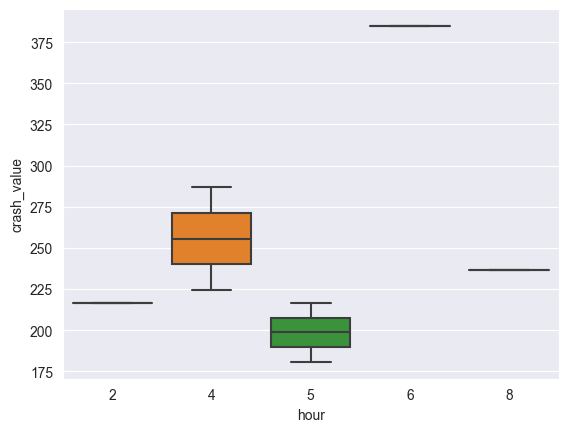

In [18]:

for i in range(1,9):
    print('Classe: ',clsf_dialect__crash[i]['name'])
    df2 = df1[df1['eval'].apply(lambda x: x == i)]
    sns.boxplot(data=df2, x='hour', y='crash_value')
    plt.show()

Fazer essa avaliação para cada faixa apara saber a melhor hora para cada faixa.

<AxesSubplot: xlabel='hour', ylabel='count'>

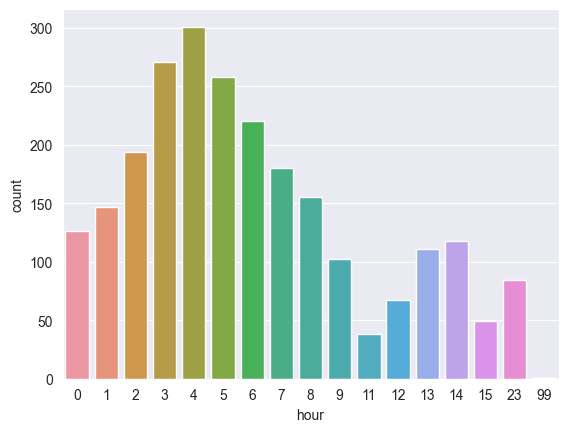

In [10]:
sns.countplot(x='hour', data=df1)

## Minha avaliação

Preciso coletar dados de 8hs as 01hs